# **PERSONAL UBER RIDE ANALYSIS**



---



# **BUSINESS UNDERSTANDING**



*1-) How are the fare paid per kilometer and distance taken related?*

*2-) What are the minimum and maximum average monthly fares ?*

*3-) What are the minimum and maximum number of trips monthly ?*

*4-) What is the mostly visited location ?*

*5-) What is the average wait time before starting to a trip ?*

*6-) How does fare per kilometer change over months ?*



# **IMPORTS & FIRST LOOK**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins

from datetime import datetime
from datetime import timedelta

from IPython.display import HTML

In [2]:
#Read raw data from the repository

url = 'https://raw.githubusercontent.com/faspy/raw_data/main/trips_data.csv'
df = pd.read_csv(url)

In [3]:
#First look at the data
df.head(10)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL
5,458,VIP,COMPLETED,2020-12-10 11:42:15 +0000 UTC,2020-12-10 11:46:20 +0000 UTC,-23.559372,-46.666473,2020-12-10 12:06:15 +0000 UTC,-23.624500,-46.701077,6.17,21.25,BRL
6,458,Black,COMPLETED,2020-12-10 01:34:25 +0000 UTC,2020-12-10 01:42:28 +0000 UTC,-23.624605,-46.700980,2020-12-10 02:01:57 +0000 UTC,-23.559233,-46.666546,5.60,36.00,BRL
7,458,UberX,COMPLETED,2020-12-07 23:48:41 +0000 UTC,2020-12-07 23:57:30 +0000 UTC,-23.627161,-46.664190,2020-12-08 00:18:11 +0000 UTC,-23.559366,-46.666637,6.71,33.22,BRL
8,458,VIP,CANCELED,2020-12-04 22:11:42 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-23.545380,-46.648098,1970-01-01 00:00:00 +0000 UTC,-23.552162,-46.636454,0.00,0.00,BRL
9,458,UberX,COMPLETED,2020-12-04 21:48:04 +0000 UTC,2020-12-04 21:56:13 +0000 UTC,-23.559399,-46.666470,2020-12-04 22:05:42 +0000 UTC,-23.547750,-46.644104,1.83,11.52,BRL


In [4]:
df.info()
#Here we can see there are missing values
#As well as Date Time columns shown as object dtype
#So should convert them into datetime objects in case we need for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


# **PREPROCESSING**

In [5]:
#Rename Columns // Delete white space 
del_space = lambda x : x.replace(' ', '')
df.rename(columns=del_space, inplace=True)
df.columns

Index(['City', 'ProductType', 'TriporOrderStatus', 'RequestTime',
       'BeginTripTime', 'BeginTripLat', 'BeginTripLng', 'DropoffTime',
       'DropoffLat', 'DropoffLng', 'Distance(miles)', 'FareAmount',
       'FareCurrency'],
      dtype='object')

In [6]:
#Here we can see category names are duplicated
df.ProductType.value_counts()

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
Juntos                    1
UberBLACK                 1
uberx                     1
Name: ProductType, dtype: int64

In [7]:
#Replace ProductType Category Names to eliminate duplication
to_replace = {'UberX' : 'UberX', 'uberX' : 'UberX', 'uberx' : 'UberX',
           'uberX VIP' : 'VIP', 'VIP' : 'VIP', 
           'POOL' : 'POOL', 'Pool' : 'POOL', 'POOL: MATCHED' : 'POOL', 
           'uberPOOL: MATCHED' : 'POOL', 'Pool: MATCHED' : 'POOL', 
           'uberPOOL' : 'POOL', 'Pool: MATCHED ' : 'POOL' , 
           'UberBLACK' : 'Black', 'Black' : 'Black'}

df.ProductType.replace(to_replace, inplace=True)

#Drop Rows with UberEats Marketplace since we are only focusing Uber Rides.
df.drop(df[df.ProductType == 'UberEATS Marketplace'].index, inplace=True)

In [8]:
#After replacing the category names we prevented the duplication
df.ProductType.value_counts()

UberX     314
VIP       152
POOL       70
Black       4
Juntos      1
Name: ProductType, dtype: int64

In [9]:
#Formatting date columns /RequestTime/BeginTripTime/DropoffTime
def format_date(df, time_cols):
  for col in time_cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC',''))
    df[col] = pd.to_datetime(df[col])
  return df

time_cols = ['RequestTime', 'BeginTripTime', 'DropoffTime']
df = format_date(df, time_cols)

df.sort_values('RequestTime', inplace=True) #Order by RequesTime, now the dataframe is chronological

In [10]:
df.TriporOrderStatus.value_counts()

COMPLETED          444
CANCELED            87
DRIVER_CANCELED     10
UNFULFILLED          3
Name: TriporOrderStatus, dtype: int64

In [11]:
#We are focusing only completed rides

completed = df[df['TriporOrderStatus'] == 'COMPLETED'] #Filter Completed rides

completed.reset_index(drop=True, inplace=True) #Reset index

In [12]:
#Final look after preprocessing
completed.head(10)

,City,ProductType,TriporOrderStatus,RequestTime,BeginTripTime,BeginTripLat,BeginTripLng,DropoffTime,DropoffLat,DropoffLng,Distance(miles),FareAmount,FareCurrency
0,458,UberX,COMPLETED,2016-04-06 21:16:52,2016-04-06 21:20:44,-23.602608,-46.645084,2016-04-06 21:41:30,-23.569549,-46.672412,3.45,15.16,BRL
1,458,UberX,COMPLETED,2016-04-07 00:30:46,2016-04-07 00:35:23,-23.569478,-46.672408,2016-04-07 00:50:14,-23.602737,-46.645352,4.08,15.06,BRL
2,458,POOL,COMPLETED,2016-06-22 11:07:02,2016-06-22 11:14:17,-23.616073,-46.665949,2016-06-22 11:24:28,-23.602760,-46.644897,2.20,7.84,BRL
3,458,UberX,COMPLETED,2016-06-22 14:24:53,2016-06-22 14:27:16,-23.602616,-46.645150,2016-06-22 14:45:05,-23.616068,-46.665922,3.28,14.02,BRL
4,458,UberX,COMPLETED,2016-06-30 03:09:49,2016-06-30 03:17:42,-23.611587,-46.570631,2016-06-30 03:45:55,-23.602654,-46.645357,6.24,23.38,BRL
5,458,UberX,COMPLETED,2016-06-30 11:27:17,2016-06-30 11:29:53,-23.602740,-46.645154,2016-06-30 11:55:45,-23.613561,-46.576380,5.51,21.13,BRL
6,458,UberX,COMPLETED,2016-08-17 11:36:38,2016-08-17 11:41:07,-23.602536,-46.645370,2016-08-17 12:07:53,-23.611022,-46.571107,5.99,27.89,BRL
7,458,UberX,COMPLETED,2016-09-14 22:44:10,2016-09-14 22:47:48,-23.602659,-46.645262,2016-09-14 22:56:51,-23.602671,-46.665019,1.68,8.40,BRL
8,458,UberX,COMPLETED,2016-09-15 00:03:01,2016-09-15 00:05:29,-23.602640,-46.665047,2016-09-15 00:13:29,-23.602629,-46.645350,2.04,9.02,BRL
9,458,UberX,COMPLETED,2016-10-06 00:37:00,2016-10-06 00:39:29,-23.611094,-46.571168,2016-10-06 01:04:19,-23.602656,-46.645095,6.27,24.75,BRL


# **ANALYSIS**

In [13]:
#Create new column "DistanceKM"
completed = completed.assign(DistanceKM = 0)
completed['DistanceKM'] = round(completed['Distance(miles)']*1.60934,2)

In [14]:
#Create new column "FarePerKM"
completed = completed.assign(FarePerKM = 0)
completed['FarePerKM'] = round(completed.FareAmount/completed.DistanceKM,2)

In [15]:
#Filter ProductType as 'UberX' to analyze Distance and FarePerKM
completed_uberx = completed[completed['ProductType']=='UberX'][['DistanceKM','FarePerKM']]

completed_uberx.sort_values('DistanceKM', inplace=True)

completed_uberx.head()

,DistanceKM,FarePerKM
348,0.47,14.77
272,0.77,10.17
274,0.82,9.57
366,0.93,6.92
263,0.95,8.26


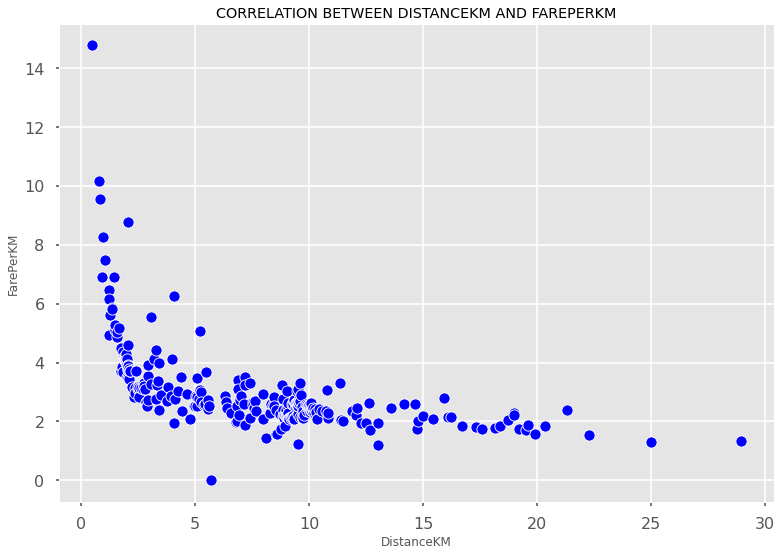

In [16]:
#Change plotting style to make it more appealing
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

#Plotting relationship between DistanceKM and FarePerKM
_ = sns.scatterplot(data=completed_uberx, x="DistanceKM", y="FarePerKM", color='Blue')
_ = plt.title('CORRELATION BETWEEN DISTANCEKM AND FAREPERKM')

In [17]:
#Create new column "YearMonth"
completed = completed.assign(YearMonth = 0)
completed.YearMonth = completed.RequestTime.map(lambda x : datetime.strftime(x,"%Y-%m"))

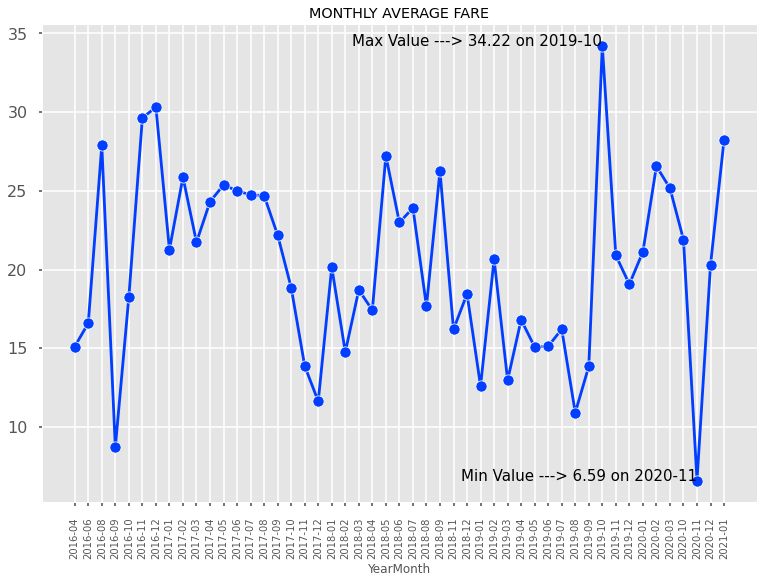

In [18]:
#Calculate monthly average fare
monthly_avg_fare = completed.groupby('YearMonth')[['FareAmount']].mean()

#Find the maximum monthly average fare
mask = monthly_avg_fare.FareAmount==np.max(monthly_avg_fare.FareAmount)
idx = monthly_avg_fare[mask].index.values[0]
val = np.max(monthly_avg_fare.FareAmount)
title = f'Max Value ---> {val} on {idx}'

#Find the minimum monthly average fare
mask2 = monthly_avg_fare.FareAmount==np.min(monthly_avg_fare.FareAmount)
idx2 = monthly_avg_fare[mask2].index.values[0]
val2 = np.min(monthly_avg_fare.FareAmount)
title2 = f'Min Value ---> {val2} on {idx2}'

#Plot Average Fare over Year-Month
_ = sns.lineplot(data=monthly_avg_fare, color='blue', markers=['o'], legend=False, palette="bright")
_ = plt.xticks(rotation='vertical', fontsize=10)
_ = plt.annotate(title, xy=(idx,val), fontsize=15, ha='right')
_ = plt.annotate(title2, xy=(idx2,val2), fontsize=15, ha='right')
_ = plt.title("MONTHLY AVERAGE FARE")

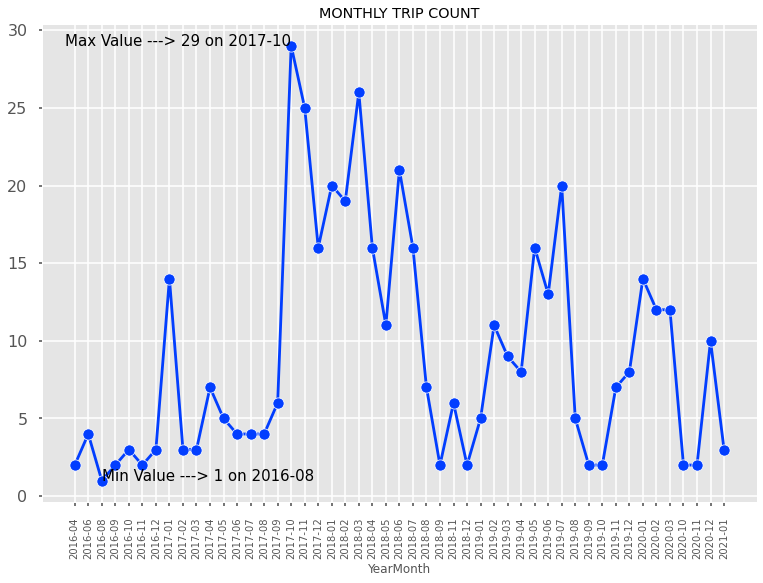

In [19]:
#Calculate Count of Trips per Month 
monthly_count_trips = completed.groupby('YearMonth')[['FareAmount']].count()

#Find the maximum number of trips per month
mask3 = monthly_count_trips.FareAmount==np.max(monthly_count_trips.FareAmount)
idx3 = monthly_count_trips[mask3].index.values[0]
val3 = np.max(monthly_count_trips.FareAmount)
title3 = f'Max Value ---> {val3} on {idx3}'

#Find the minimum number of trips per month
mask4 = monthly_count_trips.FareAmount==np.min(monthly_count_trips.FareAmount)
idx4 = monthly_count_trips[mask4].index.values[0]
val4 = np.min(monthly_count_trips.FareAmount)
title4 = f'Min Value ---> {val4} on {idx4}'

#Plot monthly trip count
_ = sns.lineplot(data=monthly_count_trips, color='blue', markers=['o'], legend=False, palette="bright")
_ = plt.xticks(rotation='vertical', fontsize=10)
_ = plt.annotate(title3, xy=(idx3,val3), fontsize=15, ha='right')
_ = plt.annotate(title4, xy=(idx4,val4), fontsize=15, ha='left')
_ = plt.title("MONTHLY TRIP COUNT")

In [20]:
#Plot heatmap over world map to show where the most drop offs took place

#Zip latitudes and longitudes
coords = []
for lat, lng in zip(completed.DropoffLat.values, completed.DropoffLng.values):
  coords.append([lat,lng])

#Create the map object
map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%',
    height='50%',
    control_scale=True)

#Plot the map
map.add_child(plugins.HeatMap(coords))
map

In [21]:
#Create new column "RideWaitTime"
completed = completed.assign(RideWaitTime=0)
completed.RideWaitTime = completed.BeginTripTime - completed.RequestTime


#Create new column "WaitTimeInSeconds"
completed = completed.assign(WaitTimeInSeconds=0)
completed.WaitTimeInSeconds = completed.RideWaitTime.map(lambda x: x.total_seconds())

In [22]:
#Minimum waiting time to start the trip
min_wait = round(np.min(completed.WaitTimeInSeconds)/60,2) 

#Maximum waiting time to start the trip
max_wait = round(np.max(completed.WaitTimeInSeconds)/60,2)

#Average waiting time to start the trip
avg_wait = round(np.mean(completed.WaitTimeInSeconds)/60,2)

#Create df for waiting durations
wait_time = pd.DataFrame(data={ 'MinimumWaitTime' : [f"{min_wait} seconds"], 'MaximumWaitTime' : [f"{max_wait} seconds"] ,'AverageWaitTime' : [f"{avg_wait} seconds"]}) 

#Print dataframe
HTML(wait_time.to_html(index=False))

MinimumWaitTime,MaximumWaitTime,AverageWaitTime
0.5 seconds,26.65 seconds,4.89 seconds


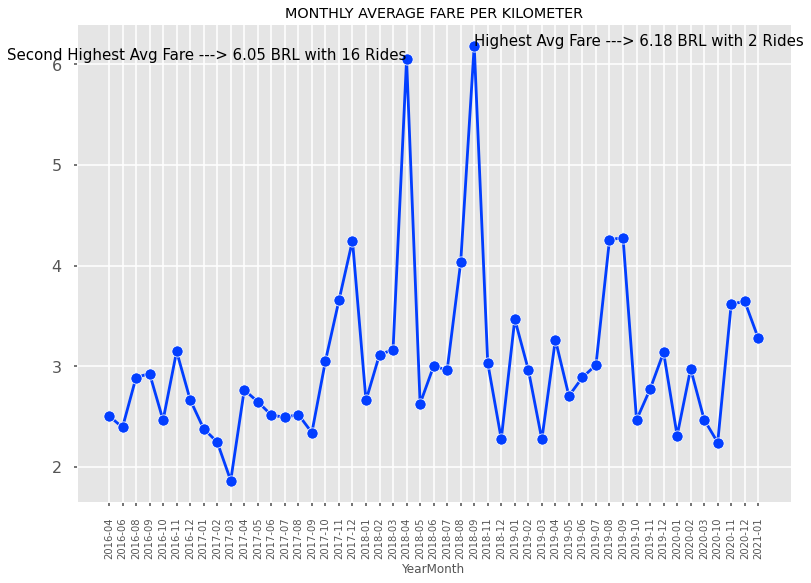

In [23]:
#Calculate Monthly average FarePerKM
avg_fare_permonth = completed[['YearMonth','FarePerKM']].groupby('YearMonth').mean()


max_fareperkm = avg_fare_permonth.sort_values('FarePerKM')['FarePerKM'][-1] #Highest Average
max2_fareperkm = avg_fare_permonth.sort_values('FarePerKM')['FarePerKM'][-2] #Second Highest Average

max_fareperkm_idx = np.argmax(avg_fare_permonth.where(
    avg_fare_permonth.FarePerKM == max_fareperkm).notnull()) #Index Highest Avg
max2_fareperkm_idx = np.argmax(avg_fare_permonth.where(
    avg_fare_permonth.FarePerKM == max2_fareperkm).notnull()) #Index Second Highest Avg

idx5 = max_fareperkm_idx #Index Highest Avg
val5 = np.round(max_fareperkm,2) #Value Highest Avg
ridecounts5 = monthly_count_trips.iloc[max_fareperkm_idx][0] #Ride Counts for Highest Avg

idx6 = max2_fareperkm_idx #Index Second Highest Avg
val6 = np.round(max2_fareperkm,2) #Value Second Highest Avg
ridecounts6 = monthly_count_trips.iloc[max2_fareperkm_idx][0] #Ride Counts for Second Highest Avg


title5 = f'Highest Avg Fare ---> {val5} BRL with {ridecounts5} Rides' #Title Highest Avg
title6 = f'Second Highest Avg Fare ---> {val6} BRL with {ridecounts6} Rides' #Title Second Highest Avg

#Plot Monthly Average FarePerKM
_ = sns.lineplot(data=avg_fare_permonth, color='blue', markers=['o'], legend=False, palette="bright")
_ = plt.xticks(rotation='vertical', fontsize=10)
_ = plt.annotate(title5, xy=(idx5,val5), fontsize=15, ha='left')
_ = plt.annotate(title6, xy=(idx6,val6), fontsize=15, ha='right')
_ = plt.title("MONTHLY AVERAGE FARE PER KILOMETER")

# **CONCLUSION**

***1-) How are the fare paid per kilometer and distance taken related?***

The above scatter plot shows us the relationship between FarePerKM and DistanceKM. We can clearly see that there is a logarithmic relationship.
As the distance taken increases the fare paid per kilometer decreases. It is evident that using the service for short rides 0 to 5 kilometers is not profitable as much as 5+ kilometers rides. 

***2-) What are the minimum and maximum average monthly fares ?***

The minimum average monthly fare observed as 6.59 BRL in November 2020. On the
other side the maximum average monthly fare is 34.22 BRL in October 2019. If we check monthly trip count graph we can see in October 2019 there is only 2 rides
taken. As well as in November 2020 there were only 2 rides taken. So we can
assume in October 2019 there were long trips.





***3-) What are the minimum and maximum number of trips monthly ?***

Looking at the number of monthly trips we can locate the minimum as 1 in August 2016 maybe this was a trial as it was the only ride in 2016. The maximum
number of trips taken in October 2017 with 29 rides. Maybe there were some incentives for using the app and the user took many rides by this means.

***4-) What is the mostly visited location ?***

In the heatmap above we can see most of the dropoffs happened in the south-west
of Sao Paulo, Brasil. Even though we see some rides taken in Rio De Janeiro and
Santos we can assume the user residing in Sao Paulo and been taking rides
frequently.

***5-) What is the average wait time before starting to a trip ?***

We find out that the average waiting time for the trip to start is 4.89 seconds.
Further more the minimum waiting time is 0.5 seconds whilst the maximum waiting time is 26.65 seconds.

***6-) How does fare per kilometer change over months ?***

The fare per kilometer is ranging between 2 to 6 BRL. We can spot the highest
average fare in September 2019 as 6.18 BRL, during this time user only took 2 rides. The second highest average fare is spotted in April 2018 as 6.05 BRL,
even though it was considerably expensive user took 16 rides. There could be many factors affecting the fare per kilometer such as gas prices or drivers count. However we can see relatively cheap rides during the pandemic.